<a href="https://colab.research.google.com/github/saurabhkr169/book/blob/main/Final_GNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/minorproject3/finalproject/Final_hindi_dataset.csv')
data = data.head(15)# A6 completes in 204 row # ! based indexing
#tweet = data['tweet_text']
#label = data['labels_value']
#ids = data['id']
#ids
idx=data['Article_number']
article_number = data['Article_number']
sentence_number = data['Sentence_number']
sentence = data['Sentence']
label = data['Label']
sentence_embedding = data['sentence_embedding']


In [ ]:
sentence_embedding

0       [-0.2787876   0.5480435   0.10335899  0.115643...
1       [-0.23955312  0.47913346  0.09359765  0.099969...
2       [-2.75654078e-01  5.50834894e-01  1.06821552e-...
3       [-2.65140444e-01  5.18633842e-01  9.10883173e-...
4       [-0.26951152  0.5291101   0.09736507  0.106716...
                              ...                        
3369    [-0.21811919  0.4350808   0.08056215  0.088717...
3370    [-0.19782847  0.3925492   0.07776566  0.082091...
3371    [-2.48479903e-01  4.89546418e-01  9.09235403e-...
3372    [-0.18642674  0.36867476  0.07129173  0.081454...
3373    [-0.20408303  0.4034163   0.07399667  0.086733...
Name: sentence_embedding, Length: 3374, dtype: object

In [ ]:
article_number

0        0
1        0
2        0
3        0
4        0
        ..
3369    50
3370    50
3371    50
3372    50
3373    50
Name: Article_number, Length: 3374, dtype: int64

In [ ]:
data

,id,Article_number,Sentence_number,Sentence,Label,sentence_embedding
0,0,0,S1,केरल के एर्नाकुलम जिले में 5 साल की बच्ची से र...,0,[-0.2787876 0.5480435 0.10335899 0.115643...
1,1,0,S2,आरोपी ने बच्ची का शव बोरे में डालकर डंपिंग ग्र...,0,[-0.23955312 0.47913346 0.09359765 0.099969...
2,2,0,S3,पुलिस ने आरोपी शख्स को गिरफ्तार कर लिया है,1,[-2.75654078e-01 5.50834894e-01 1.06821552e-...
3,3,0,S4,घटना शुक्रवार शाम की है,1,[-2.65140444e-01 5.18633842e-01 9.10883173e-...
4,4,0,S5,पुलिस ने शनिवार को मीडिया को इसकी जानकारी दी,1,[-0.26951152 0.5291101 0.09736507 0.106716...
...,...,...,...,...,...,...
3369,66,50,S67,लेकिन सरकार की उपलब्धियों के बखान के वक्त नंबर...,0,[-0.21811919 0.4350808 0.08056215 0.088717...
3370,67,50,S68,इलेस्ट्रेशन : संजय डिमरी\nएंकर: राहुल बंसल\nसु...,1,[-0.19782847 0.3925492 0.07776566 0.082091...
3371,68,50,S69,पढ़ने के लिए यहां क्लिक करें\nमंत्री और महिला न...,1,[-2.48479903e-01 4.89546418e-01 9.09235403e-...
3372,69,50,S70,:रसूखदार नेता के आगे मंत्री नतमस्तक,1,[-0.18642674 0.36867476 0.07129173 0.081454...


In [ ]:
#data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/minorproject3/finalproject/Final_hindi_dataset.csv')
#data = data.head(300)# A6 completes in 204 row # ! based indexing
#tweet = data['tweet_text']
#label = data['labels_value']
#ids = data['id']
#ids
#idx=data['Article_number']
#article_number = data['Article_number']
#sentence_number = data['Sentence_number']
#sentence = data['Sentence']
#label = data['Label']
#sentence_embedding = data['sentence_embedding']


In [ ]:
article_number

0        0
1        0
2        0
3        0
4        0
        ..
3369    50
3370    50
3371    50
3372    50
3373    50
Name: Article_number, Length: 3374, dtype: int64

In [ ]:
data

,id,Article_number,Sentence_number,Sentence,Label,sentence_embedding
0,0,0,S1,केरल के एर्नाकुलम जिले में 5 साल की बच्ची से र...,0,[-0.2787876 0.5480435 0.10335899 0.115643...
1,1,0,S2,आरोपी ने बच्ची का शव बोरे में डालकर डंपिंग ग्र...,0,[-0.23955312 0.47913346 0.09359765 0.099969...
2,2,0,S3,पुलिस ने आरोपी शख्स को गिरफ्तार कर लिया है,1,[-2.75654078e-01 5.50834894e-01 1.06821552e-...
3,3,0,S4,घटना शुक्रवार शाम की है,1,[-2.65140444e-01 5.18633842e-01 9.10883173e-...
4,4,0,S5,पुलिस ने शनिवार को मीडिया को इसकी जानकारी दी,1,[-0.26951152 0.5291101 0.09736507 0.106716...
...,...,...,...,...,...,...
3369,66,50,S67,लेकिन सरकार की उपलब्धियों के बखान के वक्त नंबर...,0,[-0.21811919 0.4350808 0.08056215 0.088717...
3370,67,50,S68,इलेस्ट्रेशन : संजय डिमरी\nएंकर: राहुल बंसल\nसु...,1,[-0.19782847 0.3925492 0.07776566 0.082091...
3371,68,50,S69,पढ़ने के लिए यहां क्लिक करें\nमंत्री और महिला न...,1,[-2.48479903e-01 4.89546418e-01 9.09235403e-...
3372,69,50,S70,:रसूखदार नेता के आगे मंत्री नतमस्तक,1,[-0.18642674 0.36867476 0.07129173 0.081454...


In [ ]:
import re

def remove_special_characters(text):
    # Remove @ symbols
    text = re.sub(r'@', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)
    text=re.sub(r'\xa0','',text)
    return text



In [ ]:
data['Sentence'] = data['Sentence'].apply(remove_special_characters)
data['Sentence']

0       केरल के एर्नाकुलम जिले में 5 साल की बच्ची से र...
1       आरोपी ने बच्ची का शव बोरे में डालकर डंपिंग ग्र...
2              पुलिस ने आरोपी शख्स को गिरफ्तार कर लिया है
3                                 घटना शुक्रवार शाम की है
4            पुलिस ने शनिवार को मीडिया को इसकी जानकारी दी
                              ...                        
3369    लेकिन सरकार की उपलब्धियों के बखान के वक्त नंबर...
3370    इलेस्ट्रेशन : संजय डिमरी\nएंकर: राहुल बंसल\nसु...
3371    पढ़ने के लिए यहां क्लिक करें\nमंत्री और महिला न...
3372                  :रसूखदार नेता के आगे मंत्री नतमस्तक
3373                   जूनियर मंत्री की हाईकमान तक शिकायत
Name: Sentence, Length: 3374, dtype: object

In [ ]:
from posixpath import join
cleand_tweet = []
for i in range(len(data)):
        text = data['Sentence'][i]



        translator = str.maketrans('', '', string.punctuation)
        cleaned_text = text.translate(translator)
        #print(cleaned_text)
        cleand_tweet.append(cleaned_text)

print(cleand_tweet)


['केरल के एर्नाकुलम जिले में 5 साल की बच्ची से रेप के बाद गला दबाकर हत्या कर दी गई', 'आरोपी ने बच्ची का शव बोरे में डालकर डंपिंग ग्राउंड में फेंक दिया था', 'पुलिस ने आरोपी शख्स को गिरफ्तार कर लिया है', 'घटना शुक्रवार शाम की है', 'पुलिस ने शनिवार को मीडिया को इसकी जानकारी दी', 'CCTV फुटेज में बच्ची के साथ नजर आया आरोपी\nएर्नाकुलम SP विवेक कुमार ने बताया बच्ची शुक्रवार शाम को किडनैप हुई थी', 'हमारी टीम ने CCTV फुटेज चेक किए जिसमें बच्ची को आरोपी के साथ देखा गया', 'उसी दिन रात 930 बजे आरोपी को गिरफ्तार कर लिया गया', 'उस समय वह नशे की हालत में था और बच्ची उसके साथ नहीं थी', 'स्थानीय लोगों ने बच्ची को मार्केट के पास आरोपी के साथ देखा था', 'उन्होंने पुलिस को इसकी जानकारी दी', 'पुलिस ने पूरे एरिया में सर्चिंग की तो मार्केट के पीछे बच्ची की लाश मिली', 'इस इलाके में लोग कूड़ा फेंकते थे और कई असामाजिक लोग यहां नशा करने आते थे', 'बच्ची की बिल्डिंग में ही रहता था आरोपी\nपुलिस ने बताया आरोपी शख्स बिहार का रहने वाला है और केरल में मजदूरी करता है', 'बच्ची के मातापिता भी बिहार के हैं और मजदूरी करते है

In [ ]:
import ast

In [ ]:
import re
##########################################################################################Changes####################################################
# Assuming `data['sentence_embedding']` contains string representations of lists

# Define a function to extract floating-point numbers from the string representations
def extract_floats(string_repr):
    # Use regular expression to find all floating-point numbers in the string
    return [float(match.group()) for match in re.finditer(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', string_repr)]

# Apply the function to each element of the 'sentence_embedding' column
data['sentence_embedding'] = data['sentence_embedding'].apply(extract_floats)

# Now `data['sentence_embedding']` contains lists of floating-point numbers

# Then you can use it in cosine_similarity function
cosine_similarities = cosine_similarity(data['sentence_embedding'].tolist(), data['sentence_embedding'].tolist())


In [ ]:
cosine_similarities

array([[1.        , 0.9999641 , 0.99994603, ..., 0.9999761 , 0.99993835,
        0.99993839],
       [0.9999641 , 1.        , 0.99996219, ..., 0.99995503, 0.99990477,
        0.99991396],
       [0.99994603, 0.99996219, 1.        , ..., 0.99993412, 0.99988668,
        0.99992239],
       ...,
       [0.9999761 , 0.99995503, 0.99993412, ..., 1.        , 0.99992196,
        0.99990923],
       [0.99993835, 0.99990477, 0.99988668, ..., 0.99992196, 1.        ,
        0.99989709],
       [0.99993839, 0.99991396, 0.99992239, ..., 0.99990923, 0.99989709,
        1.        ]])

In [ ]:
#tfidf_vectorizer = TfidfVectorizer()
#nodes = tfidf_vectorizer.fit_transform(cleand_tweet)
#print(nodes.shape)
#nodes = nodes.toarray()
#cosine_similarities = cosine_similarity(nodes, nodes)
#cosine_similarities
# Print cosine similarity matrix
#print(cosine_similarities.shape)
#print(type(cosine_similarities))




In [ ]:
import numpy as np

# Assuming 'data['sentence_embedding']' contains lists of floating-point numbers representing embeddings for each sentence
sentence_embeddings = data['sentence_embedding']

# Determine the number of dimensions in the embeddings
num_dimensions = len(sentence_embeddings.iloc[0])  # Assuming all embeddings have the same number of dimensions

# Initialize an empty array to store the embeddings
nodes = np.zeros((len(sentence_embeddings), num_dimensions))

# Fill the 'nodes' array with sentence embeddings
for i, embedding_list in enumerate(sentence_embeddings):
    nodes[i] = embedding_list

# Print the shape of 'nodes' to verify the dimensions
print("Shape of 'nodes':", nodes.shape)


Shape of 'nodes': (3374, 100)


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
# Create an empty graph
G = nx.Graph()

# Add edges based on the adjacency matrix
for i in range(len(cosine_similarities)):

    for j in range( len(cosine_similarities[0])):
        if cosine_similarities[i][j] > 0.01 and cosine_similarities[i][j] < 1:
            G.add_edge(i, j, weight=round(cosine_similarities[i][j],3))
pos = nx.spring_layout(G)
#print(pos)
# If you want to visualize the graph, you can use matplotlib


# Draw the graph
nx.draw(G, with_labels=True, node_size=200, node_color='skyblue', font_size=5, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G,pos, edge_labels=labels)
plt.savefig('Graph.png')
#plt.show()


In [ ]:
from networkx.readwrite import json_graph

In [ ]:
json_data = json_graph.node_link_data(G)
json_data

In [ ]:
# Convert links to DataFrame
links_df = pd.DataFrame(json_data['links'])

# Rename columns
links_df = links_df.rename(columns={'source': 'source', 'target': 'target'})

# Now you have your DataFrame with 'source' and 'target' columns
print(links_df)

In [ ]:
len(links_df['source'].unique())

In [ ]:
len(links_df['target'].unique())

In [ ]:
term =[f"term_{article_number}" for article_number in range(len(nodes[1]))]
print(term)

In [ ]:
#import pandas as pd ######################################################Changes made here######################

# Assuming 'nodes' and 'term' are already defined
# Assuming 'data' contains your feature data
# Assuming 'label' contains your label data

# Creating DataFrame for features
#feature = pd.DataFrame(nodes, columns=term)  # Assuming 'nodes' is a 2D array-like object

# Create a DataFrame for sentences
#sentence_df = pd.DataFrame(sentence, columns=["Sentence"])

# Concatenating feature DataFrame with article numbers, sentences, and labels
#result = pd.concat([data[['Article_number']], data[['id']], sentence_df, feature, data[['Label']]], axis=1)
#print(result)


In [ ]:
import pandas as pd

# Assuming 'nodes' and 'term' are already defined
# Assuming 'data' contains your feature data
# Assuming 'label' contains your label data

# Creating DataFrame for features
feature = pd.DataFrame(nodes, columns=term)  # Assuming 'nodes' is a 2D array-like object
#sentenceOf = pd.DataFrame(sentence)
# Concatenating feature DataFrame with article numbers and labels
result = pd.concat([data[['Article_number']],data[['id']], feature, data[['Label']]], axis=1)
print(result)

In [ ]:
# Mapping unique values in 'Label' column to numerical indices, limiting it to 1000
class_values = sorted(result['Label'].unique())
class_idx = {name: idx for idx, name in enumerate(class_values)}

# Mapping unique values in 'Article_number' column to numerical indices, limiting it to 1000
paper_idx = {name: idx for idx, name in enumerate(sorted(result['id'].unique()))}


# Applying mapping to 'Article_number' column
result["id"] = result["id"].apply(lambda name: paper_idx[name])

# Applying mapping to 'Label' column
result['Label'] = result['Label'].apply(lambda value: class_idx[value])





In [ ]:
print(result.columns)


In [ ]:
feature_names = set(result.columns) - {'article_number', "Label",'id'}
num_features = len(feature_names)
num_classes = len(class_idx)

# Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
edges = links_df[["source", "target"]].to_numpy().T
# Create an edge weights array of ones.
weights = links_df[['weight']].to_numpy().T
#print(edge_weights1)
edge_weights = tf.convert_to_tensor(weights)
print(edge_weights)
#edge_weights2 = tf.ones(shape=edges.shape[1])
#print(edge_weights2)

# Create a node features array of shape [num_nodes, num_features].
node_features = tf.cast(
    result.sort_values("id")[list(feature_names)].to_numpy(), dtype=tf.dtypes.float32
)
# Create graph info tuple with node_features, edges, and edge_weights.
graph_info = (node_features, edges, edge_weights)

print("Edges shape:", edges.shape)
print("Nodes shape:", node_features.shape)

tf.Tensor([[0.11  0.089 0.33  ... 0.464 0.696 0.696]], shape=(1, 9191), dtype=float64)
Edges shape: (2, 9191)
Nodes shape: (300, 439)


In [ ]:
from collections import Counter

In [ ]:
train_indices = []
test_indices = []

# Assuming 'result' DataFrame is sorted by 'Article_number'
num_articles = result['Article_number'].nunique()
num_train_articles = int(0.8 * num_articles)  # 80% for training

# Iterate over unique article numbers
for article_number, group_data in result.groupby("Article_number"):
    if article_number <= num_train_articles:
        train_indices.extend(group_data.index)
    else:
        test_indices.extend(group_data.index)

# Select data based on the indices
train_data = result.loc[train_indices]
test_data = result.loc[test_indices]

# Shuffle the data
train_data = train_data.sample(frac=1)
test_data = test_data.sample(frac=1)

# Check the shapes of train and test data
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


In [ ]:
#############################changes Alert####################################
train_indices = []
test_indices = []

# Calculate the number of articles for training and testing
num_articles = result['Article_number'].nunique()
num_train_articles = int(0.8 * num_articles)  # 80% for training
num_test_articles = num_articles - num_train_articles

# Initialize counters for train and test articles
train_count = 0
test_count = 0

# Iterate over unique article numbers
for article_number, group_data in result.groupby("Article_number"):
    # Check if the current article should be added to the training or testing set
    if train_count < num_train_articles:
        train_indices.extend(group_data.index)
        train_count += 1
    elif test_count < num_test_articles:
        test_indices.extend(group_data.index)
        test_count += 1
    else:
        break  # Break the loop once both train and test articles are allocated

# Shuffle the data
train_data = result.loc[train_indices].sample(frac=1)
test_data = result.loc[test_indices].sample(frac=1)

# Check the shapes of train and test data
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


In [ ]:
#train_indices = []
#test_indices = []

# Sort the DataFrame by "Article_number"
#result_sorted = result.sort_values(by="Article_number")

# Calculate the index for splitting
#split_index = int(len(result_sorted) * 0.8)

# Get the indices for training and testing data
#train_indices = result_sorted.index[:split_index]
#test_indices = result_sorted.index[split_index:]

# Select data based on the indices
#train_data = result.loc[train_indices]
#test_data = result.loc[test_indices]

# Shuffle the data (optional)
#train_data = train_data.sample(frac=1)
#test_data = test_data.sample(frac=1)

# Check the shapes of train and test data
#print("Train data shape:", train_data.shape)
#print("Test data shape:", test_data.shape)


Train data shape: (240, 441)
Test data shape: (60, 441)


In [ ]:
train_data

,Article_number,id,term_0,term_1,term_2,term_3,term_4,term_5,term_6,term_7,...,term_429,term_430,term_431,term_432,term_433,term_434,term_435,term_436,term_437,Label
162,4,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
181,4,53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
262,5,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
51,1,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
202,4,74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,5,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
138,4,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
211,4,83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
53,1,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
test_data

,Article_number,id,term_0,term_1,term_2,term_3,term_4,term_5,term_6,term_7,...,term_429,term_430,term_431,term_432,term_433,term_434,term_435,term_436,term_437,Label
225,5,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0
297,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0
254,5,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,1
283,5,70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,1
229,5,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,1
224,5,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0
223,5,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0
251,5,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0
278,5,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,1
233,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,1


In [ ]:
hidden_units = [32, 32]
learning_rate = 0.01
dropout_rate = 0.5
num_epochs = 300
batch_size = 256


In [ ]:
def run_experiment(model, x_train, y_train):
    # Compile the model.
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=["acc"],
    )
    tf.saved_model.save(model, "saved_model.h5")
    # Create an early stopping callback.
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_acc", patience=10, restore_best_weights=True
    )
    # Fit the model.
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.15,
        callbacks=[early_stopping],
    )

    return history

In [ ]:
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["acc"])
    ax2.plot(history.history["val_acc"])
    ax2.legend(["train", "test"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")

    plt.savefig('Training.png')
    #plt.show()

In [ ]:
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)

In [ ]:
feature_names = list(set(result.columns) - {'id', 'labels_value'})
num_features = len(feature_names)
num_classes = len(class_idx)

# Create train and test features as a numpy array.
x_train = train_data[feature_names].to_numpy()

x_test = test_data[feature_names].to_numpy()
# Create train and test targets as a numpy array.
y_train = train_data['Label']
y_test = test_data['Label']

Build a Graph Neural network Model


In [ ]:
def create_gru(hidden_units, dropout_rate):
    inputs = keras.layers.Input(shape=(2, hidden_units[0]))
    x = inputs
    for units in hidden_units:
      x = layers.GRU(
          units=units,
          activation="tanh",
          recurrent_activation="sigmoid",
          return_sequences=True,
          dropout=dropout_rate,
          return_state=False,
          recurrent_dropout=dropout_rate,
      )(x)
    return keras.Model(inputs=inputs, outputs=x)


class GraphConvLayer(layers.Layer):
    def __init__(
        self,
        hidden_units,
        dropout_rate=0.2,
        aggregation_type="mean",
        combination_type="concat",
        normalize=False,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        if self.combination_type == "gru":
            self.update_fn = create_gru(hidden_units, dropout_rate)
        else:
            self.update_fn = create_ffn(hidden_units, dropout_rate)

    def prepare(self, node_repesentations, weights=None):
        # node_repesentations shape is [num_edges, embedding_dim].
        messages = self.ffn_prepare(node_repesentations)
        if weights is not None:
            messages = messages * tf.expand_dims(weights, -1)
        return messages

    def aggregate(self, neighbour_messages, node_indices, node_repesentations):
        # node_indices shape is [num_edges].
        # neighbour_messages shape: [num_edges, representation_dim].
        # node_repesentations shape is [num_nodes, representation_dim]
        num_nodes = node_repesentations.shape[0]
        #print('num_nodes',num_nodes)
        if self.aggregation_type == "sum":
            aggregated_message = tf.math.unsorted_segment_sum(
                  neighbour_messages, node_indices,  num_segments=num_nodes
            )
            #print('aggregated_message',aggregated_message)
        elif self.aggregation_type == "mean":
            aggregated_message = tf.math.unsorted_segment_mean(
                  neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "max":
            aggregated_message = tf.math.unsorted_segment_max(
                   neighbour_messages, node_indices,  num_segments=num_nodes
            )
        else:
            raise ValueError(f"Invalid aggregation type: {self.aggregation_type}.")

        return aggregated_message

    def update(self, node_repesentations, aggregated_messages):
        # node_repesentations shape is [num_nodes, representation_dim].
        # aggregated_messages shape is [num_nodes, representation_dim].
        if self.combination_type == "gru":
            # Create a sequence of two elements for the GRU layer.
            h = tf.stack([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "concat":
            # Concatenate the node_repesentations and aggregated_messages.
            h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "add":
            # Add node_repesentations and aggregated_messages.
            h = node_repesentations + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")

        # Apply the processing function.
        node_embeddings = self.update_fn(h)
        if self.combination_type == "gru":
            node_embeddings = tf.unstack(node_embeddings, axis=1)[-1]

        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings

    def call(self, inputs):
        """Process the inputs to produce the node_embeddings.

        inputs: a tuple of three elements: node_repesentations, edges, edge_weights.
        Returns: node_embeddings of shape [num_nodes, representation_dim].
        """

        node_repesentations, edges, edge_weights = inputs
        print('node_repesentations',node_repesentations.shape)
        #print('edges',edges)
        #print('edge_weights',edge_weights)
        # Get node_indices (source) and neighbour_indices (target) from edges.
        node_indices, neighbour_indices = edges[0], edges[1]
        #print('node_indices',node_indices.shape)
        #print('neighbour_indices',neighbour_indices)
        # neighbour_repesentations shape is [num_edges, representation_dim].
        neighbour_repesentations = tf.gather(node_repesentations, neighbour_indices)
        #print('neighbour_repesentations',neighbour_repesentations)
        # Prepare the messages of the neighbours.
        neighbour_messages = self.prepare(neighbour_repesentations, edge_weights)
        #print('neighbour_messages',neighbour_messages.shape)


        neighbour_messagess = tf.squeeze(neighbour_messages)
        # Aggregate the neighbour messages.
        aggregated_messages = self.aggregate(
             neighbour_messagess, node_indices, node_repesentations
        )
        print('aggregated_messages',aggregated_messages.shape)

        # Update the node embedding with the neighbour messages.
        return self.update(node_repesentations, aggregated_messages)

In [ ]:
class GNNNodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        num_classes,
        hidden_units,
        aggregation_type="sum",
        combination_type="concat",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        print('hello')
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = layers.Dense(units=1, name="logits", activation = 'sigmoid')

    def call(self, input_node_indices):
        # Preprocess the node_features to produce node representations.
        x = self.preprocess(self.node_features)
        #print(x)
        # Apply the first graph conv layer.
        x1 = self.conv1((x, self.edges, self.edge_weights))
        #print('x1',x1)
        # Skip connection.
        x = x1 + x
        # Apply the second graph conv layer.
        x2 = self.conv2((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x2 + x
        # Postprocess node embedding.
        x = self.postprocess(x)
        print(x)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.gather(x, input_node_indices)
        # Compute logits
        return self.compute_logits(node_embeddings)

In [ ]:
gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1,10, 32]))



hello
node_repesentations (300, 32)
aggregated_messages (300, 32)
node_repesentations (300, 32)
aggregated_messages (300, 32)
tf.Tensor(
[[-0.01528704  0.07947252 -0.01413136 ... -0.04935015  0.04322932
   0.01783332]
 [-0.08926806  0.06948916  0.13406576 ...  0.03122356 -0.03553457
   0.02320412]
 [-0.07483429  0.08087785  0.14430064 ...  0.07882214 -0.0787695
  -0.03111111]
 ...
 [-0.07493396  0.04810668  0.14268905 ...  0.08069989 -0.09574342
  -0.06715938]
 [-0.06400633  0.08430126  0.14493044 ...  0.07959587 -0.10412177
  -0.06880309]
 [-0.06938898  0.04515065  0.12543726 ...  0.0891073  -0.09238552
  -0.07173784]], shape=(300, 32), dtype=float32)
GNN output shape: tf.Tensor(
[[0.5045439 ]
 [0.51935476]
 [0.51805246]], shape=(3, 1), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (300, 32)                 17020     
                    

In [ ]:
gnn_model.summary()

In [ ]:
x_train = train_data.Article_number.to_numpy()
history = run_experiment(gnn_model, x_train, y_train)

node_repesentations (300, 32)
aggregated_messages (300, 32)
node_repesentations (300, 32)
aggregated_messages (300, 32)
Tensor("gnn_model/postprocess/dense_23/Gelu/mul_1:0", shape=(300, 32), dtype=float32)
node_repesentations (300, 32)
aggregated_messages (300, 32)
node_repesentations (300, 32)
aggregated_messages (300, 32)
Tensor("postprocess/StatefulPartitionedCall:0", shape=(300, 32), dtype=float32)
node_repesentations (300, 32)
aggregated_messages (300, 32)
node_repesentations (300, 32)
aggregated_messages (300, 32)
Tensor("postprocess/StatefulPartitionedCall:0", shape=(300, 32), dtype=float32)


node_repesentations (300, 32)
aggregated_messages (300, 32)
node_repesentations (300, 32)
aggregated_messages (300, 32)
node_repesentations (300, 32)
aggregated_messages (300, 32)
node_repesentations (300, 32)
aggregated_messages (300, 32)
Epoch 1/300
node_repesentations (300, 32)
aggregated_messages (300, 32)
node_repesentations (300, 32)
aggregated_messages (300, 32)
Tensor("gnn_model/postprocess/dense_23/Gelu/mul_1:0", shape=(300, 32), dtype=float32)
node_repesentations (300, 32)
aggregated_messages (300, 32)
node_repesentations (300, 32)
aggregated_messages (300, 32)
Tensor("gnn_model/postprocess/dense_23/Gelu/mul_1:0", shape=(300, 32), dtype=float32)
1/1 [==============================] - ETA: 0s - loss: 1.1009 - acc: 0.3039node_repesentations (300, 32)
aggregated_messages (300, 32)
node_repesentations (300, 32)
aggregated_messages (300, 32)
Tensor("gnn_model/postprocess/dense_23/Gelu/mul_1:0", shape=(300, 32), dtype=float32)
1/1 [==============================] - 9s 9s/step - los

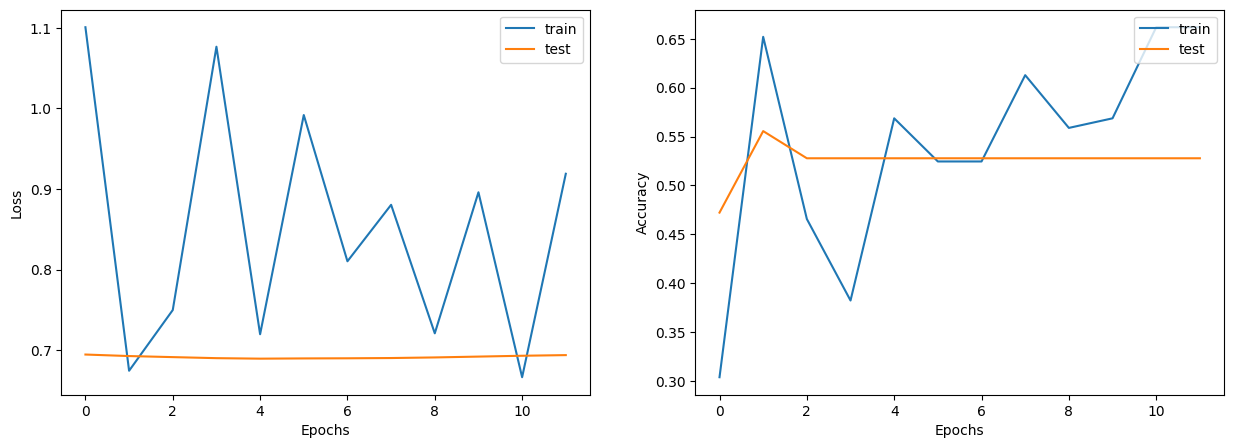

In [ ]:
display_learning_curves(history)

In [ ]:
x_test = test_data.Article_number.to_numpy()
print(x_test)
_, test_accuracy = gnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

[5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5
 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
Test accuracy: 51.67%


In [ ]:
logits = gnn_model.predict(tf.convert_to_tensor(x_test))
print(logits)
#probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()
#print(probabilities)

#display_class_probabilities(probabilities)

node_repesentations (300, 32)
aggregated_messages (300, 32)
node_repesentations (300, 32)
aggregated_messages (300, 32)
Tensor("gnn_model/postprocess/dense_23/Gelu/mul_1:0", shape=(300, 32), dtype=float32)
2/2 [==============================] - 1s 28ms/step
[[0.49985987]
 [0.5057395 ]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.5057395 ]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.5057395 ]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]
 [0.49985987]


In [ ]:
test_data

,Article_number,id,term_0,term_1,term_2,term_3,term_4,term_5,term_6,term_7,...,term_429,term_430,term_431,term_432,term_433,term_434,term_435,term_436,term_437,Label
225,5,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0
297,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0
254,5,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,1
283,5,70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,1
229,5,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,1
224,5,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0
223,5,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0
251,5,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0
278,5,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,1
233,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,1


In [ ]:
len(test_data)

60

In [ ]:
threshold = 0.44
binary_labels=(logits>threshold).astype(int)
print(binary_labels)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [ ]:
len(binary_labels)

60

In [ ]:
# Print article number, corresponding ID, and binary labels
for article_number, article_id, label in zip(test_data['Article_number'], test_data['id'], binary_labels):
    print(f"Article Number: {article_number}, ID: {article_id}, Binary Labels: {label}")

Article Number: 5, ID: 12, Binary Labels: [1]
Article Number: 6, ID: 0, Binary Labels: [1]
Article Number: 5, ID: 41, Binary Labels: [1]
Article Number: 5, ID: 70, Binary Labels: [1]
Article Number: 5, ID: 16, Binary Labels: [1]
Article Number: 5, ID: 11, Binary Labels: [1]
Article Number: 5, ID: 10, Binary Labels: [1]
Article Number: 5, ID: 38, Binary Labels: [1]
Article Number: 5, ID: 65, Binary Labels: [1]
Article Number: 5, ID: 20, Binary Labels: [1]
Article Number: 5, ID: 28, Binary Labels: [1]
Article Number: 5, ID: 9, Binary Labels: [1]
Article Number: 5, ID: 75, Binary Labels: [1]
Article Number: 5, ID: 76, Binary Labels: [1]
Article Number: 5, ID: 32, Binary Labels: [1]
Article Number: 5, ID: 34, Binary Labels: [1]
Article Number: 5, ID: 67, Binary Labels: [1]
Article Number: 5, ID: 29, Binary Labels: [1]
Article Number: 5, ID: 30, Binary Labels: [1]
Article Number: 5, ID: 15, Binary Labels: [1]
Article Number: 5, ID: 21, Binary Labels: [1]
Article Number: 5, ID: 6, Binary Lab

In [ ]:
# Create a DataFrame to hold the information
result_df = pd.DataFrame({
    'Article_number': test_data['Article_number'],
    'Id': test_data['id'],
    'Binary_labels': binary_labels.flatten()
})

# Print the DataFrame
print(result_df)

     Article_number  Id  Binary_labels
225               5  12              1
297               6   0              1
254               5  41              1
283               5  70              1
229               5  16              1
224               5  11              1
223               5  10              1
251               5  38              1
278               5  65              1
233               5  20              1
241               5  28              1
222               5   9              1
288               5  75              1
289               5  76              1
245               5  32              1
247               5  34              1
280               5  67              1
242               5  29              1
243               5  30              1
228               5  15              1
234               5  21              1
219               5   6              1
238               5  25              1
291               5  78              1
231               5  18  

In [ ]:
# Predict probabilities for each class
#probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()

# Initialize a dictionary to store sentences for each class label
class_sentences = {label: [] for label in range(len(binary_labels))}

# Associate each sentence with its predicted class label
for idx, label in enumerate(binary_labels):
    # Ensure label is scalar
    label = int(label)
    class_sentences[label].append(data['Sentence'].iloc[idx])

# Select sentences with class label 1
selected_sentences = class_sentences[1]

# Print selected sentences
for sentence in selected_sentences:
    print(sentence)

केरल के एर्नाकुलम जिले में 5 साल की बच्ची से रेप के बाद गला दबाकर हत्या कर दी गई
आरोपी ने बच्ची का शव बोरे में डालकर डंपिंग ग्राउंड में फेंक दिया था
पुलिस ने आरोपी शख्स को गिरफ्तार कर लिया है
घटना शुक्रवार शाम की है
पुलिस ने शनिवार को मीडिया को इसकी जानकारी दी
CCTV फुटेज में बच्ची के साथ नजर आया आरोपी
एर्नाकुलम SP विवेक कुमार ने बताया- बच्ची शुक्रवार शाम को किडनैप हुई थी
हमारी टीम ने CCTV फुटेज चेक किए जिसमें बच्ची को आरोपी के साथ देखा गया
उसी दिन रात 9.30 बजे आरोपी को गिरफ्तार कर लिया गया
उस समय वह नशे की हालत में था और बच्ची उसके साथ नहीं थी
स्थानीय लोगों ने बच्ची को मार्केट के पास आरोपी के साथ देखा था
उन्होंने पुलिस को इसकी जानकारी दी
पुलिस ने पूरे एरिया में सर्चिंग की तो मार्केट के पीछे बच्ची की लाश मिली
इस इलाके में लोग कूड़ा फेंकते थे और कई असामाजिक लोग यहां नशा करने आते थे
बच्ची की बिल्डिंग में ही रहता था आरोपी
पुलिस ने बताया- आरोपी शख्स बिहार का रहने वाला है और केरल में मजदूरी करता है
बच्ची के माता-पिता भी बिहार के हैं और मजदूरी करते हैं
जिस इमारत में बच्ची रहती थी
उसी बिल्डिंग

<ipython-input-114-b8641991b783>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(label)


In [ ]:
len(selected_sentences)

60

In [ ]:
# Predict probabilities for each class
#probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()

# Initialize a list to store sentences with class label 1 and their corresponding article numbers
selected_sentences = []

# Associate each sentence with its predicted class label and article number
for idx, (sentence, article_number) in enumerate(zip(data['Sentence'], test_data['Article_number'])):
    label = binary_labels[idx]
    if label == 1:
        selected_sentences.append((sentence, article_number))

# Print selected sentences with their corresponding article numbers
for sentence, article_number in selected_sentences:
    print(f"Article Number: {article_number}, Sentence: {sentence}")

Article Number: 5, Sentence: केरल के एर्नाकुलम जिले में 5 साल की बच्ची से रेप के बाद गला दबाकर हत्या कर दी गई
Article Number: 6, Sentence: आरोपी ने बच्ची का शव बोरे में डालकर डंपिंग ग्राउंड में फेंक दिया था
Article Number: 5, Sentence: पुलिस ने आरोपी शख्स को गिरफ्तार कर लिया है
Article Number: 5, Sentence: घटना शुक्रवार शाम की है
Article Number: 5, Sentence: पुलिस ने शनिवार को मीडिया को इसकी जानकारी दी
Article Number: 5, Sentence: CCTV फुटेज में बच्ची के साथ नजर आया आरोपी
एर्नाकुलम SP विवेक कुमार ने बताया- बच्ची शुक्रवार शाम को किडनैप हुई थी
Article Number: 5, Sentence: हमारी टीम ने CCTV फुटेज चेक किए जिसमें बच्ची को आरोपी के साथ देखा गया
Article Number: 5, Sentence: उसी दिन रात 9.30 बजे आरोपी को गिरफ्तार कर लिया गया
Article Number: 5, Sentence: उस समय वह नशे की हालत में था और बच्ची उसके साथ नहीं थी
Article Number: 5, Sentence: स्थानीय लोगों ने बच्ची को मार्केट के पास आरोपी के साथ देखा था
Article Number: 5, Sentence: उन्होंने पुलिस को इसकी जानकारी दी
Article Number: 5, Sentence: पुलिस 

In [ ]:
# Initialize a dictionary to store sentences for each article number
article_sentences = {}

# Associate each sentence with its article number
for sentence, article_number in selected_sentences:
    if article_number not in article_sentences:
        article_sentences[article_number] = []
    article_sentences[article_number].append(sentence)

# Convert the lists of sentences into paragraphs for each article
for article_number, sentences in article_sentences.items():
    article_paragraph = ', '.join(sentences)
    print(f"Article Number: {article_number}\nParagraph:\n{article_paragraph}\n")


Article Number: 5
Paragraph:
केरल के एर्नाकुलम जिले में 5 साल की बच्ची से रेप के बाद गला दबाकर हत्या कर दी गई, पुलिस ने आरोपी शख्स को गिरफ्तार कर लिया है, घटना शुक्रवार शाम की है, पुलिस ने शनिवार को मीडिया को इसकी जानकारी दी, CCTV फुटेज में बच्ची के साथ नजर आया आरोपी
एर्नाकुलम SP विवेक कुमार ने बताया- बच्ची शुक्रवार शाम को किडनैप हुई थी, हमारी टीम ने CCTV फुटेज चेक किए जिसमें बच्ची को आरोपी के साथ देखा गया, उसी दिन रात 9.30 बजे आरोपी को गिरफ्तार कर लिया गया, उस समय वह नशे की हालत में था और बच्ची उसके साथ नहीं थी, स्थानीय लोगों ने बच्ची को मार्केट के पास आरोपी के साथ देखा था, उन्होंने पुलिस को इसकी जानकारी दी, पुलिस ने पूरे एरिया में सर्चिंग की तो मार्केट के पीछे बच्ची की लाश मिली, इस इलाके में लोग कूड़ा फेंकते थे और कई असामाजिक लोग यहां नशा करने आते थे, बच्ची की बिल्डिंग में ही रहता था आरोपी
पुलिस ने बताया- आरोपी शख्स बिहार का रहने वाला है और केरल में मजदूरी करता है, बच्ची के माता-पिता भी बिहार के हैं और मजदूरी करते हैं, जिस इमारत में बच्ची रहती थी, उसी बिल्डिंग के पहले फ्लोर पर आरोपी 

In [ ]:
article_paragraph

'आरोपी ने बच्ची का शव बोरे में डालकर डंपिंग ग्राउंड में फेंक दिया था, जिससे सात घर, राजस्थान'

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/minorproject3/finalproject/hindi_train.csv')
# Fetching the 8th article
article_1 = df.iloc[1]
print(article_1['Article'])

मानसून सीजन में हुई भारी बारिश ने कई राज्यों में भारी तबाही मचाई है। हिमाचल प्रदेश में पिछले 40 दिनों में 187 लोगों की जान जा चुकी है, वहीं 34 लोग लापता हैं।
तेलंगाना में एक हफ्ते में 18 लोगों की मौत हो गई। करीब 12,000 लोगों को राहत शिविरों में पहुंचाया गया है।
उधर, शनिवार को जम्मू-कश्मीर के गांदरबल जिले के एक गांव में बादल फट गया। जिससे सात घर, एक मस्जिद और दो स्कूल क्षतिग्रस्त हो गए।
उत्तराखंड के चमोली में रविवार सुबह पहाड़ों से पत्थर गिरने के बाद बद्रीनाथ नेशनल हाईवे को बंद करना पड़ा। हालांकि, 2 घंटे बाद हाईवे ट्रैफिक के लिए खोल दिया गया।
अगले 24 घंटे कैसे रहेंगे…
इन राज्यों में तेज बारिश होगी: हिमाचल, महाराष्ट्र, उत्तराखंड, उत्तर प्रदेश, राजस्थान, मध्यप्रदेश, बिहार, झारखंड, गोवा, छत्तीसगढ़, ओडिशा, पश्चिम बंगाल, असम, अरुणाचल प्रदेश।
बारिश की संभावना नहीं: जम्मू-कश्मीर, पंजाब, हरियाणा, पश्चिमी राजस्थान, गुजरात, कर्नाटक, आंध्र प्रदेश, केरल, तमिलनाडु में बारिश की संभावना नहीं है।
अलग-अलग राज्यों से मानसून की तस्वीरें...
अन्य राज्यों में मौसम का हाल...


In [ ]:
summary_article_1=article_1['Summary']

In [ ]:
summary_article_1

'इस साल मानसून सीजन में कई राज्यों में भारी तबाही मची है। हिमाचल प्रदेश में अब तक 187 लोगों की जान जा चुकी है। वहीं तेलंगाना में एक हफ्ते में 18 लोगों की मौत हो गई। तेलंगाना में करीब 12,000 लोगों को राहत शिविरों में Bihar UP Monsoon Rainfall Update; Rajasthan Indore Bhopal | Chhattisgarh, West Bengal Weather Forecast'

In [ ]:
pip install rouge-score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=be97752d0b886dd4bbacc790fd0f6c4b892fb85d0d48b25bbf5cf4f7e18b1609
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
pip install evaluate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
pip install rouge


In [ ]:
!pip install rouge


In [ ]:
article_paragraph="इस साल के मानसून के मौसम ने कई राज्यों में तबाही मचा दी है, हिमाचल प्रदेश में अब तक 187 मौतों की सूचना है और तेलंगाना में एक हफ्ते में 18 लोगों की मौत हो गई है। तेलंगाना में लगभग 12,000 लोगों को राहत शिविरों में पहुंचाया गया है। साथ ही, जम्मू-कश्मीर में बादलों के फटने से घरों, मस्जिदों, और स्कूलों में क्षतिग्रस्ति होने की खबरें हैं, और उत्तराखंड में पहाड़ों से पत्थर गिरने के कारण बद्रीनाथ नेशनल हाईवे पर यातायात में बाधा हो गई है। आगामी 24 घंटों में हिमाचल प्रदेश, महाराष्ट्र, उत्तराखंड, उत्तर प्रदेश, राजस्थान, मध्य प्रदेश, बिहार, झारखंड, गोवा, छत्तीसगढ़, ओडिशा, पश्चिम बंगाल, असम, और अरुणाचल प्रदेश जैसे राज्यों में भारी बारिश की संभावना है। विपरीत रूप से, जम्मू-कश्मीर, पंजाब, हरियाणा, पश्चिमी राजस्थान, गुजरात, कर्नाटक, आंध्र प्रदेश, केरल, और तमिलनाडु जैसे क्षेत्रों में बारिश की संभावना कम है।"

In [ ]:
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.bleu_score import SmoothingFunction
from rouge import Rouge

# Example generated summaries and actual summaries
#generated_summaries = ["This is a summary.", "Another summary here."]
#actual_summaries = ["This is the actual summary.", "This is another actual summary."]

# Initialize Rouge
rouge = Rouge()

# Calculate Rouge scores
scores = rouge.get_scores(article_paragraph, summary_article_1, avg=True)

print("ROUGE-1 Precision:", scores['rouge-1']['p'])
print("ROUGE-1 Recall:", scores['rouge-1']['r'])
print("ROUGE-1 F1 Score:", scores['rouge-1']['f'])
print("ROUGE-2 Precision:", scores['rouge-2']['p'])
print("ROUGE-2 Recall:", scores['rouge-2']['r'])
print("ROUGE-2 F1 Score:", scores['rouge-2']['f'])
print("ROUGE-L Precision:", scores['rouge-l']['p'])
print("ROUGE-L Recall:", scores['rouge-l']['r'])
print("ROUGE-L F1 Score:", scores['rouge-l']['f'])


ROUGE-1 Precision: 0.26262626262626265
ROUGE-1 Recall: 0.5416666666666666
ROUGE-1 F1 Score: 0.353741492200472
ROUGE-2 Precision: 0.17164179104477612
ROUGE-2 Recall: 0.4107142857142857
ROUGE-2 F1 Score: 0.24210525900055402
ROUGE-L Precision: 0.24242424242424243
ROUGE-L Recall: 0.5
ROUGE-L F1 Score: 0.32653060784673055
